In [2]:
url = input("ENter")

In [3]:
from newspaper import Article
import requests
from newspaper.configuration import Configuration
import json

# URL of the article
# Custom configuration to set headers
config = Configuration()
config.browser_user_agent = (
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
)

# Create the Article object with the custom configuration
article = Article(url, config=config)

try:
    # Fetch and parse the article
    article.download()
    article.parse()
    
    # Extract content
    article_data = {
        "title": article.title,
        "authors": article.authors,
        "publication_date": str(article.publish_date) if article.publish_date else "Unknown",
        "content": article.text,
        "url": url
    }

    # Convert to JSON
    article_json = json.dumps(article_data, indent=4)
    print(article_json)

except Exception as e:
    print(f"An error occurred: {e}")

article_dict = json.loads(article_json)

# Extract the content part
content = article_dict.get("content", "Content not found")
print(content)

{
    "title": "Trump \"Strongly\" Requests Putin To Spare Lives Of Ukrainian Soldiers",
    "authors": [],
    "publication_date": "Unknown",
    "content": "US President Donald Trump said on Friday there is a \"very good chance\" the war between Russia and Ukraine can end after \"productive\" discussions with Russian President Vladimir Putin on Thursday.\n\n\"We had very good and productive discussions with President Vladimir Putin of Russia yesterday, and there is a very good chance that this horrible, bloody war can finally come to an end,\" Trump said in a Truth Social post, adding that he had requested that Putin spare the lives of \"completely surrounded\" Ukrainian troops.\n\nUS envoy Steve Witkoff had a long meeting with Putin in Moscow on Thursday night, a source briefed on the matter, who spoke on condition of anonymity, said.\n\nThe Truth Social post did not say whether Trump and Putin had spoken to each other.\n\nHowever, Kremlin spokesman Dmitry Peskov said Putin had used

In [4]:
headline = article_dict.get("content", "content not found")

In [5]:
headline

'US President Donald Trump said on Friday there is a "very good chance" the war between Russia and Ukraine can end after "productive" discussions with Russian President Vladimir Putin on Thursday.\n\n"We had very good and productive discussions with President Vladimir Putin of Russia yesterday, and there is a very good chance that this horrible, bloody war can finally come to an end," Trump said in a Truth Social post, adding that he had requested that Putin spare the lives of "completely surrounded" Ukrainian troops.\n\nUS envoy Steve Witkoff had a long meeting with Putin in Moscow on Thursday night, a source briefed on the matter, who spoke on condition of anonymity, said.\n\nThe Truth Social post did not say whether Trump and Putin had spoken to each other.\n\nHowever, Kremlin spokesman Dmitry Peskov said Putin had used the meeting to convey "signals" to Trump through Witkoff. He said Russia and the US would work out the timing of a phone call between their presidents once Witkoff h

In [6]:
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

# Sample long news article (Modify this with any long text)
news_article = headline

# Tokenizing words
words = nltk.word_tokenize(news_article.lower())

# Remove stopwords and duplicate words
stop_words = set(stopwords.words("english"))
filtered_words = []
seen_words = set()

for word in words:
    if word.isalpha() and word not in stop_words and word not in seen_words:
        filtered_words.append(word)
        seen_words.add(word)

print("Filtered Words:", filtered_words)


Filtered Words: ['us', 'president', 'donald', 'trump', 'said', 'friday', 'good', 'chance', 'war', 'russia', 'ukraine', 'end', 'productive', 'discussions', 'russian', 'vladimir', 'putin', 'thursday', 'yesterday', 'horrible', 'bloody', 'finally', 'come', 'truth', 'social', 'post', 'adding', 'requested', 'spare', 'lives', 'completely', 'surrounded', 'ukrainian', 'troops', 'envoy', 'steve', 'witkoff', 'long', 'meeting', 'moscow', 'night', 'source', 'briefed', 'matter', 'spoke', 'condition', 'anonymity', 'say', 'whether', 'spoken', 'however', 'kremlin', 'spokesman', 'dmitry', 'peskov', 'used', 'convey', 'signals', 'would', 'work', 'timing', 'phone', 'call', 'presidents', 'wants', 'kyiv', 'agree', 'swift', 'ceasefire', 'pause', 'fighting', 'conflict', 'warned', 'potential', 'spiral', 'world', 'three', 'already', 'cost', 'many', 'sides', 'except', 'headline', 'story', 'edited', 'ndtv', 'staff', 'published', 'syndicated', 'feed']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\liyan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import torch
from collections import defaultdict

# Set embedding size
embedding_dim = 10

# Create word embedding (Each word gets a random 10D vector)
word_to_vec = defaultdict(lambda: torch.randn(embedding_dim))

# Convert filtered words into embeddings
word_embeddings = torch.stack([word_to_vec[word] for word in filtered_words])

print("Shape of Word Embeddings:", word_embeddings.shape)


Shape of Word Embeddings: torch.Size([90, 10])


In [8]:
import torch.nn as nn

word_embeddings = word_embeddings.unsqueeze(0)  # (1, sequence_length, embedding_dim)

class LeapGRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LeapGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # Output layer for real/fake classification
        self.sigmoid = nn.Sigmoid()  # To get probability (0 = fake, 1 = real)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)  # (num_layers, batch_size, hidden_size)
        out, _ = self.gru(x, h0)  # GRU forward pass
        out = self.fc(out[:, -1, :])  # Take last output
        return self.sigmoid(out)  # Output probability


# Define model
hidden_size = 20
num_layers = 1
model = LeapGRU(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers)

# Pass data through Leap-GRU
output = model(word_embeddings)

print("Prediction Probability (Real News):", output.item())
print("Final List of Processed Words:", filtered_words)


Prediction Probability (Real News): 0.5155264735221863
Final List of Processed Words: ['us', 'president', 'donald', 'trump', 'said', 'friday', 'good', 'chance', 'war', 'russia', 'ukraine', 'end', 'productive', 'discussions', 'russian', 'vladimir', 'putin', 'thursday', 'yesterday', 'horrible', 'bloody', 'finally', 'come', 'truth', 'social', 'post', 'adding', 'requested', 'spare', 'lives', 'completely', 'surrounded', 'ukrainian', 'troops', 'envoy', 'steve', 'witkoff', 'long', 'meeting', 'moscow', 'night', 'source', 'briefed', 'matter', 'spoke', 'condition', 'anonymity', 'say', 'whether', 'spoken', 'however', 'kremlin', 'spokesman', 'dmitry', 'peskov', 'used', 'convey', 'signals', 'would', 'work', 'timing', 'phone', 'call', 'presidents', 'wants', 'kyiv', 'agree', 'swift', 'ceasefire', 'pause', 'fighting', 'conflict', 'warned', 'potential', 'spiral', 'world', 'three', 'already', 'cost', 'many', 'sides', 'except', 'headline', 'story', 'edited', 'ndtv', 'staff', 'published', 'syndicated', 'f

In [9]:
import pandas as pd

# Load the Excel file
file_path = "news_keywords.xlsx"  # Update the path if necessary
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,Word,Category
0,Column1,Column2
1,Government,Politics & Governance
2,Election,Politics & Governance
3,Policy,Politics & Governance
4,President,Politics & Governance


In [10]:
import pandas as pd

# Load the Excel file
file_path = "news_keywords.xlsx"  # Update with your file path
df = pd.read_excel(file_path, usecols=[0, 1])  # Read only the first two columns

# Convert to dictionary with unique values per category
category_dict = {}
for value, category in zip(df.iloc[1:, 0], df.iloc[1:, 1]):
    category_dict.setdefault(category, set()).add(value.lower())  # Use set instead of list

# Print or use the dictionary
print(category_dict)


{'Politics & Governance': {'government', 'authority', 'coalition', 'president', 'policy', 'bureaucracy', 'constitution', 'campaign', 'election', 'democracy', 'senate', 'legislation', 'parliament', 'minister', 'opposition', 'congress', 'reform', 'treaty', 'ballot', 'law', 'prime minister', 'summit', 'diplomatic', 'sanctions', 'vote', 'corruption'}, 'Economy & Business': {'venture capital', 'loss', 'recession', 'investment', 'unemployment', 'market', 'tax', 'dividend', 'budget', 'finance', 'interest rate', 'stock', 'profit', 'gdp', 'revenue', 'merger', 'commodity', 'shares', 'export', 'corporation', 'industry', 'economy', 'inflation', 'trade', 'banking', 'deficit', 'startup', 'debt', 'acquisition', 'consumer'}, 'International Relations & Conflict': {'embargo', 'un', 'defense', 'attack', 'border', 'security', 'arms deal', 'refugee', 'hostilities', 'alliance', 'resolution', 'conflict', 'missile', 'war', 'negotiation', 'occupation', 'peace', 'ceasefire', 'truce', 'espionage', 'retaliation',

In [11]:
category_keywords = category_dict

In [12]:
from collections import Counter

# Compute similarity percentages
category_similarity = {}
for category, keywords in category_keywords.items():
    matched_words = set(filtered_words) & keywords  # Common words
    similarity = (len(matched_words) / len(keywords)) * 100  # Percentage similarity
    category_similarity[category] = similarity

# Output results
print("Category Similarity Percentages:")
for category, similarity in category_similarity.items():
    print(f"{category}: {similarity:.2f}%")


Category Similarity Percentages:
Politics & Governance: 3.85%
Economy & Business: 0.00%
International Relations & Conflict: 10.71%
Health & Science: 0.00%
Technology & Innovation: 0.00%
Disasters & Emergencies: 0.00%
Crime & Legal Affairs: 0.00%
Sports & Entertainment: 0.00%


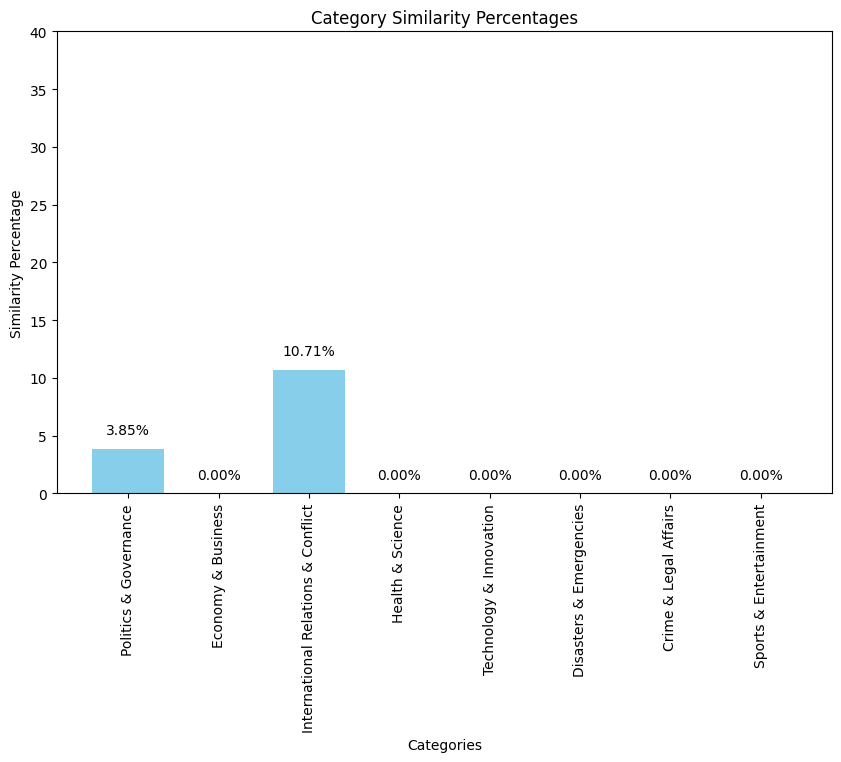

In [23]:
import matplotlib.pyplot as plt

categories = list(category_similarity.keys())
similarities = list(category_similarity.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, similarities, color='skyblue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Similarity Percentage')
plt.title('Category Similarity Percentages')
plt.xticks(rotation=90)
# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Display the plot
plt.ylim(0, 40)  # Ensure the y-axis starts at 0 and ends at 100
plt.show()
